In [20]:
import torch
import torch.nn as nn
import torchvision
from dataloaders import load_cifar10_for_resnet18
from trainer import Trainer, compute_loss_and_accuracy
from task2 import create_plots

In [2]:
class ResNet18(nn.Module):

    def __init__(self):
        """
            Is called when model is initialized.
        """
        super().__init__()
        self.model = torchvision.models.resnet18(pretrained=True)
        self.model.fc = nn.Linear(512,10)   # No need to apply softmax,
                                            # this is done in nn.CrossEntropyLoss
        for param in self.model.parameters():   #Freeze all parameters
            param.requires_grad = False
        for param in self.model.fc.parameters():    # Unfreeze the last fully-connected layer
            param.requires_grad = True
        for param in self.model.layer4.parameters():    #Unfreeze last 5 conv layers
            param.requires_grad = True
            
    def forward(self, x):
        x = self.model(x)
        return x

In [3]:
epochs = 10 # It should converge within 5 epochs
batch_size = 32
learning_rate = 5e-4
early_stop_count = 4
dataloaders = load_cifar10_for_resnet18(batch_size)
model = ResNet18()
trainer = Trainer(
    batch_size,
    learning_rate,
    early_stop_count,
    epochs,
    model,
    dataloaders
)
trainer.optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate) #
trainer.train()

Files already downloaded and verified
Files already downloaded and verified


Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to C:\Users\Embla/.cache\torch\hub\checkpoints\resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:03<00:00, 13.2MB/s]


ResNet18(
  (model): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_runn

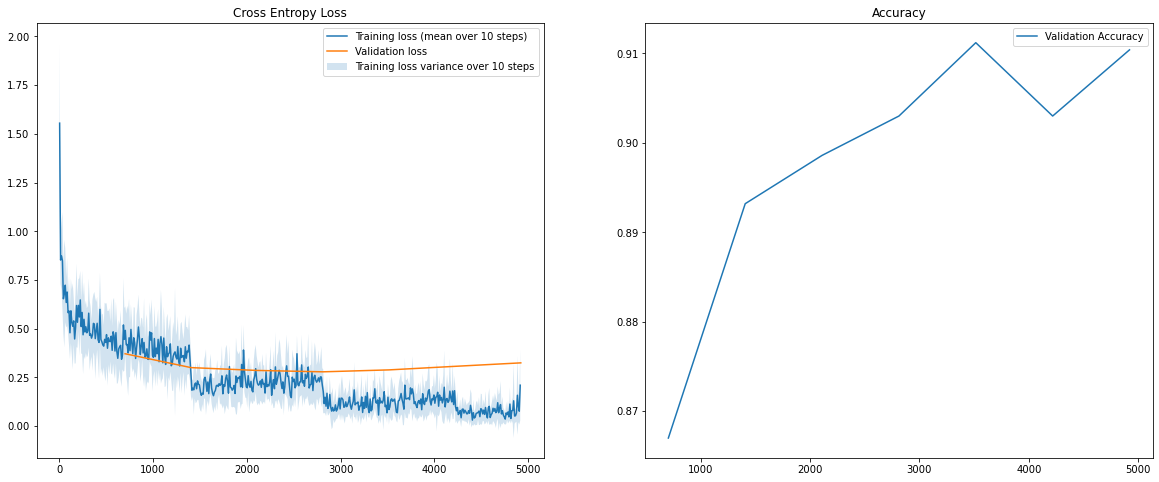

In [21]:
create_plots(trainer, "task4a")

In [7]:

# dataloaders = [dataloader_train, dataloader_val, dataloader_test]
# _ , final_train_accuracy = compute_loss_and_accuracy(dataloaders[0], trainer.model, trainer.loss_criterion)
# _ , final_val_accuracy = compute_loss_and_accuracy(dataloaders[1], trainer.model, trainer.loss_criterion)
_ , final_test_accuracy = compute_loss_and_accuracy(dataloaders[2], trainer.model, trainer.loss_criterion)

# print("Train Accuracy: " + str(final_train_accuracy))
print("Test Accuracy: " + str(final_test_accuracy))
# print("Validation Accuracy: " + str(final_val_accuracy))


Test Accuracy: 0.8882
